# Diamond EP Resolution LDA v.2#

Previously LDA had little to no success in separating success from failure, or even high from low sucess rate spacegroups. In this notebook, the same analysis will be repeated in each spacegroup cluster.

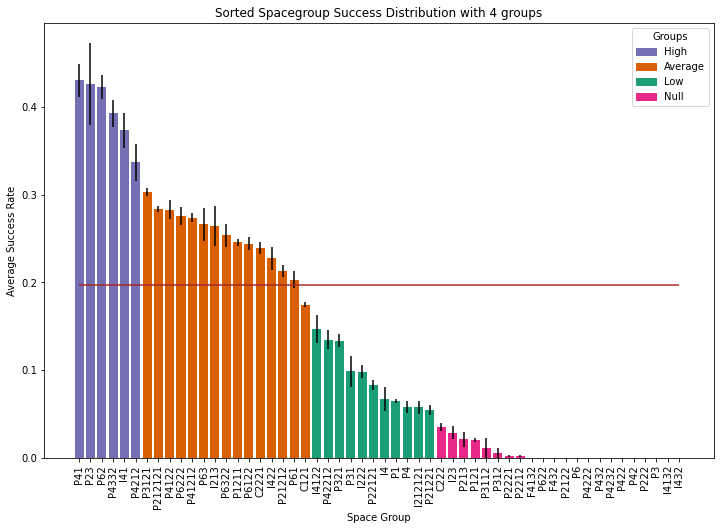

2
               F''  HIGH_RES_LIMIT  LOW_RES_LIMIT  COMPLETENESS  MULTIPLICITY  \
count  4160.000000     4160.000000    4160.000000   4160.000000   4160.000000   
mean      3.497438        3.797959      25.853135     99.253798      8.718462   
std       0.819651        1.697878      15.124545      1.876977      9.729817   
min       0.499566        1.320000       9.910000     87.300000      3.000000   
25%       3.398721        2.500000      13.940000     99.700000      4.200000   
50%       3.836894        3.500000      17.975000    100.000000      6.400000   
75%       3.839457        5.000000      39.670000    100.000000      9.500000   
max       3.841244        7.040000     113.210000    100.000000     75.700000   

           I_SIGMA     RMERGE_I  RMERGE_DIFF_I      RMEAS_I  RMEAS_DIFF_I  \
count  4160.000000  4160.000000    4160.000000  4160.000000   4160.000000   
mean     25.721635     0.069103       0.054959     0.075656      0.065661   
std      15.334869     0.037968      

In [17]:
import sys
dirpath = r'/home/ynk78583/PycharmProjects/Diamond_ML'
if dirpath not in sys.path:
    sys.path.insert(0, dirpath)
from read_data import x, y, union, pd, np, plt
from grouping import cluster_spacegroups, avg_success_bar_plot
from sklearn.cluster import KMeans


# separate data by spacegroup clusters
n = 4
model, pred, agg_sorted = cluster_spacegroups(union, n)

# show bar plot
avg_success_bar_plot(agg_sorted, y, pred)


# get each cluster
union_dummy = union.copy()
union_dummy["CLUSTER"] = union["SPACEGROUP"].map(pred)
cluster_masks = {i: union_dummy[union_dummy["CLUSTER"]==i] for i in pred.drop_duplicates()}

for cluster, data in cluster_masks.items():
    print(cluster, data.describe(), "--------------", sep="\n")